In [56]:
# import the required libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.externals.six import StringIO
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from tempfile import mkdtemp
from shutil import rmtree
import folium
from folium import plugins
from sklearn import metrics
%matplotlib inline

In [57]:
import seaborn as sns

In [58]:
# setting the working directory 
import os
os.chdir("E:\Courses\Edwisor\Cab fare prediction")

In [59]:
# loading the training data
df_train = pd.read_csv("train_cab.csv")
df_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [60]:
df_train.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [61]:
df_test = pd.read_csv("test.csv")
df_test.shape

(9914, 6)

In [62]:
# checking the shape of the data
df_train.shape

(16067, 7)

In [63]:
# cheking the data type of each column of the data
df_train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [64]:
# cheking the NaN values for each column
df_train.isnull().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [65]:
df_test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [66]:
df_test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [67]:
df_train = df_train.dropna()
df_train.shape

(15988, 7)

In [68]:
# removing the unwanted character from the fare_amount column
df_train['fare_amount'] = df_train['fare_amount'].str.replace("-","")
# convering the datatype to float from string
df_train['fare_amount'] = df_train['fare_amount'].astype(float)
df_train.shape

(15988, 7)

In [69]:
# foltering the data
# because zero or negative fare are not possible so removing those enteries
df_train = df_train[df_train.fare_amount > 0]
# passenger_count cannot be zero or a number greater than 6 so we can remove those enteries
df_train = df_train[df_train.passenger_count != 0]
df_train = df_train[df_train.passenger_count < 6]
# fractional value of the number of passenger is also not possible so removing them
df_train = df_train[df_train.passenger_count != 0.12]
df_train = df_train[df_train.passenger_count != 1.3]
df_train.shape

(15608, 7)

In [70]:
# foltering the data
# because zero or negative fare are not possible so removing those enteries
#df_test = df_test[df_test.fare_amount > 0]
# passenger_count cannot be zero or a number greater than 6 so we can remove those enteries
df_test = df_test[df_test.passenger_count != 0]
df_test = df_test[df_test.passenger_count < 6]
# fractional value of the number of passenger is also not possible so removing them
df_test = df_test[df_test.passenger_count != 0.12]
df_test = df_test[df_test.passenger_count != 1.3]
df_test.shape

(9737, 6)

In [71]:
df_test.shape

(9737, 6)

In [72]:
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9737.000000,9737.000000,9737.000000,9737.000000,9737.000000
mean,-73.974696,40.751077,-73.973678,40.751719,1.592585
std,0.042870,0.033662,0.039094,0.035433,1.148075
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992480,40.736167,-73.991221,40.735257,1.000000
50%,-73.982277,40.753079,-73.980000,40.754052,1.000000
75%,-73.967935,40.767152,-73.964172,40.768732,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,5.000000


In [73]:
df_test['passenger_count'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [74]:
df_train.shape

(15608, 7)

In [75]:
# the value of latitude is ranged between -90 to 90 and the value of longitude is ranged from -180 to 180. So fileting the data
# in accordance with that.
# writing the conditions to filter the location
condition1 = df_train.dropoff_longitude < 180
condition2 = df_train.dropoff_longitude > -180
condition3 = df_train.dropoff_latitude > -90
condition4 = df_train.dropoff_latitude < 90
condition5 = df_train.pickup_longitude < 180
condition6 = df_train.pickup_longitude > -180
condition7 = df_train.pickup_latitude > -90
condition8 = df_train.pickup_latitude < 90
# combining all the conditions into a single condition
condition = condition1 & condition2 & condition3 & condition4 & condition5 & condition6 & condition7 & condition8
df_train = df_train[condition]
df_train.shape

(15607, 7)

In [76]:
# the value of latitude is ranged between -90 to 90 and the value of longitude is ranged from -180 to 180. So fileting the data
# in accordance with that.
# writing the conditions to filter the location
condition9 = df_test.dropoff_longitude < 180
condition10 = df_test.dropoff_longitude > -180
condition11 = df_test.dropoff_latitude > -90
condition12 = df_test.dropoff_latitude < 90
condition13 = df_test.pickup_longitude < 180
condition14 = df_test.pickup_longitude > -180
condition15 = df_test.pickup_latitude > -90
condition16 = df_test.pickup_latitude < 90
# combining all the conditions into a single condition
test_condition = condition9 & condition10 & condition11 & condition12 & condition13 & condition14 & condition15 & condition16
df_test = df_test[test_condition]
df_test.shape

(9737, 6)

In [77]:
df_train["pickup_datetime"] = pd.to_datetime(df_train["pickup_datetime"], format = "%Y-%m-%d %H:%M:%S UTC", errors = "coerce")

df_train["year"] = df_train["pickup_datetime"].dt.year
df_train["month"] = df_train["pickup_datetime"].dt.month
df_train["date"] = df_train["pickup_datetime"].dt.day
df_train["day"] = df_train["pickup_datetime"].dt.dayofweek
df_train["hour"] = df_train["pickup_datetime"].dt.hour

df_test["pickup_datetime"] = pd.to_datetime(df_test["pickup_datetime"], format = "%Y-%m-%d %H:%M:%S UTC", errors = "coerce")

df_test["year"] = df_test["pickup_datetime"].dt.year
df_test["month"] = df_test["pickup_datetime"].dt.month
df_test["date"] = df_test["pickup_datetime"].dt.day
df_test["day"] = df_test["pickup_datetime"].dt.dayofweek
df_test["hour"] = df_test["pickup_datetime"].dt.hour

In [78]:
df_train.isna().sum()

fare_amount          0
pickup_datetime      1
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 1
month                1
date                 1
day                  1
hour                 1
dtype: int64

In [79]:
df_train = df_train.dropna()

In [80]:
df_train.shape

(15606, 12)

In [81]:
df_train["distance"] = np.sqrt((df_train["pickup_latitude"]-df_train["dropoff_latitude"])**2
                               +(df_train["pickup_longitude"]-df_train["dropoff_longitude"])**2)

df_test["distance"] = np.sqrt((df_test["pickup_latitude"]-df_test["dropoff_latitude"])**2
                               +(df_test["pickup_longitude"]-df_test["dropoff_longitude"])**2)

df_train = df_train[df_train.distance != 0]
df_test = df_test[df_test.distance != 0]
df_train.shape

(15159, 13)

In [82]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,distance
count,15159.000000,15159.000000,15159.000000,15159.000000,15159.000000,15159.000000,15159.000000,15159.000000,15159.000000,15159.000000,15159.000000,1.515900e+04
mean,15.272202,-73.868493,40.668197,-73.858284,40.668767,1.567386,2011.714691,6.270862,15.670493,3.037272,13.501088,1.578993e-01
std,442.823958,3.168482,2.697993,3.268946,2.696932,1.124195,1.870371,3.445673,8.686788,1.969653,6.513942,3.167522e+00
min,0.010000,-74.438233,-74.006893,-74.227047,-73.994392,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,1.000000e-06
25%,6.000000,-73.992370,40.736548,-73.991339,40.736261,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.303066e-02
50%,8.500000,-73.982052,40.753303,-73.980537,40.754246,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,2.217934e-02
75%,12.500000,-73.968134,40.767798,-73.965396,40.768361,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,3.932840e-02
max,54343.000000,40.766125,41.366138,40.802437,41.366138,5.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,8.448094e+01


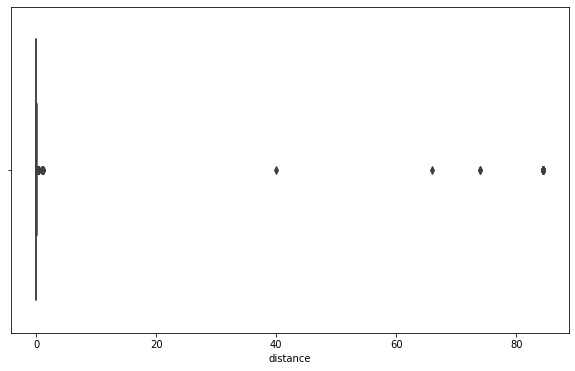

In [83]:
# boxplot for the distance
plt.figure(figsize=(10,6))
ax = sns.boxplot(x=df_train["distance"]) 

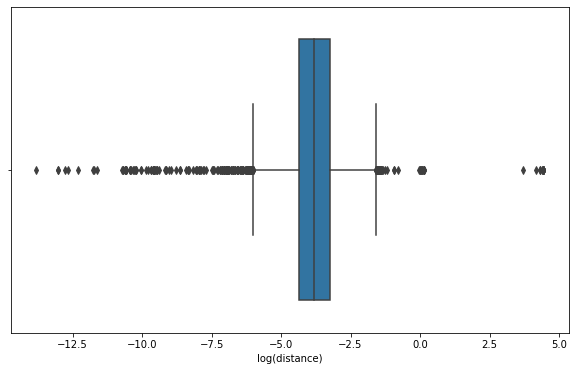

In [84]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x=np.log(df_train["distance"])).set(xlabel = "log(distance)") # log function is used to zoom in the graph

In [85]:
df_train.shape[0]

15159

Values lying outside the upper fence and the lower fence are considered as the outlier and need to remove.

In [86]:
# maxima of the distance column is very high and impractical so removing the instances falling outside of the fence.
a = df_train.shape[0]
dis_q75, dis_q25 = np.percentile(df_train.distance, [75 ,25])
dis_iqr = dis_q75 - dis_q25
#print(q75,q25,iqr)

dis_min = dis_q25 - (dis_iqr*1.5)
dis_max = dis_q75 + (dis_iqr*1.5)
#print(min)
#print(max)
    
# Extracting the data between the lower fence and upper fence
df_train = df_train.drop(df_train[df_train.distance < dis_min].index)
df_train = df_train.drop(df_train[df_train.distance > dis_max].index)
b = df_train.shape[0]
print(a-b)

1363


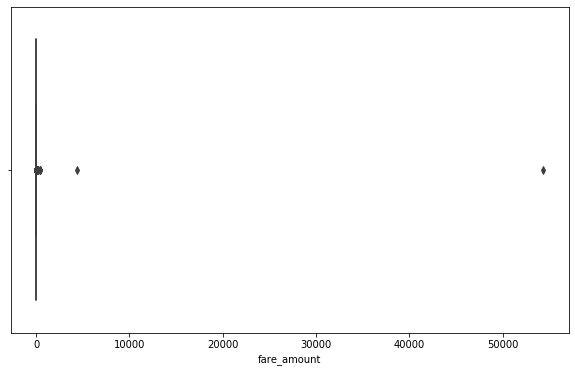

In [87]:
# boxplot for the fare amount
plt.figure(figsize=(10,6))
ax = sns.boxplot(x=df_train["fare_amount"])

The above plot shows that the fare column contains few very large values in comparison to its most of the values. Taking the log function to the axis to zoom in to plot more clear plot.

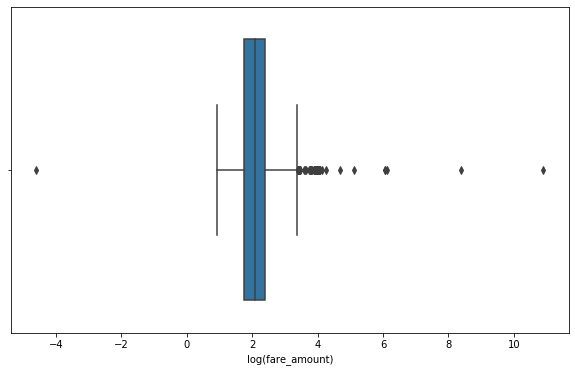

In [88]:
# boxplot for the distance
plt.figure(figsize=(10,6))
ax = sns.boxplot(x=np.log(df_train["fare_amount"])).set(xlabel = "log(fare_amount)" )

In [89]:
# maxima of the fare_amount column is very high and impractical so removing the instances falling outside of the fence.
a = df_train.shape[0]
q75, q25 = np.percentile(df_train.fare_amount, [75 ,25])
iqr = q75 - q25
#print(q75,q25,iqr)

min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
#print(min)
#print(max)
    
# Extracting the data between the lower fence and upper fence
df_train = df_train.drop(df_train[df_train.fare_amount < min].index)
df_train = df_train.drop(df_train[df_train.fare_amount > max].index)
b = df_train.shape[0]
print(" The number of entries removed is", a-b)

 The number of entries removed is 568


Text(0, 0.5, 'Fare')

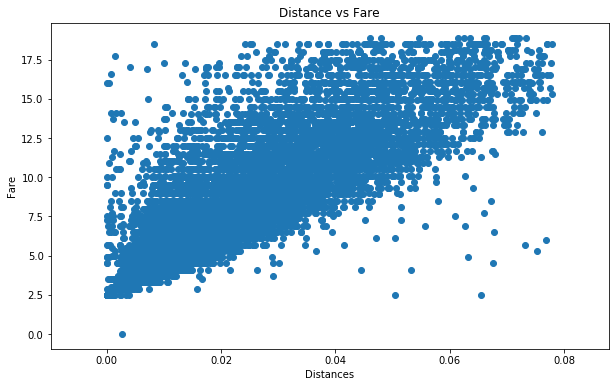

In [90]:
plt.figure(figsize=(10,6))
plt.scatter(df_train.distance,df_train.fare_amount)
plt.title('Distance vs Fare')
plt.xlabel('Distances')
plt.ylabel('Fare')

It is very clear from the above graph that the cab fare is increased with the distance which is quiet obvious.

Text(0, 0.5, 'Fare')

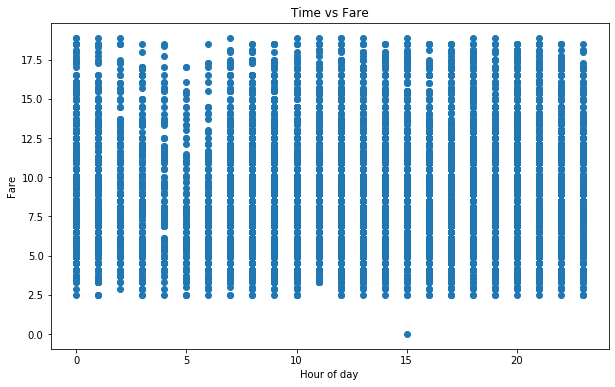

In [91]:
plt.figure(figsize=(10,6))
plt.scatter(df_train.hour,df_train.fare_amount)
plt.title('Time vs Fare')
plt.xlabel('Hour of day')
plt.ylabel('Fare')

There is almost same fare for each hour of the day.Which shows that the hour of the day uncorelated to the cab fare.

Text(0, 0.5, 'Frequency')

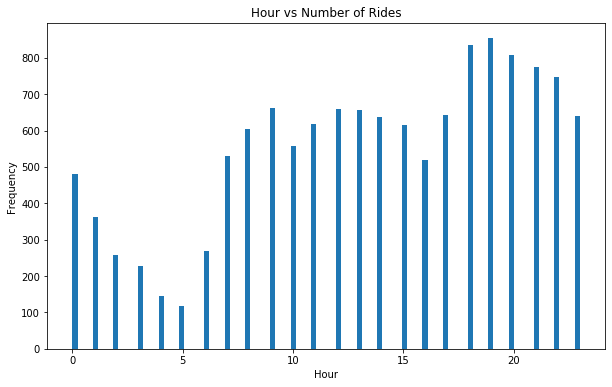

In [92]:
plt.figure(figsize=(10,6))
plt.hist(df_train.hour, bins=100)
plt.title('Hour vs Number of Rides')
plt.xlabel('Hour')
plt.ylabel('Frequency')

The number of rides are least in the early morning near 5:00 AM. The number of rides increased during the working hours but the number rides is highest in the evening near 6:00 PM. So people rush more during that time.

Text(0, 0.5, 'Fare')

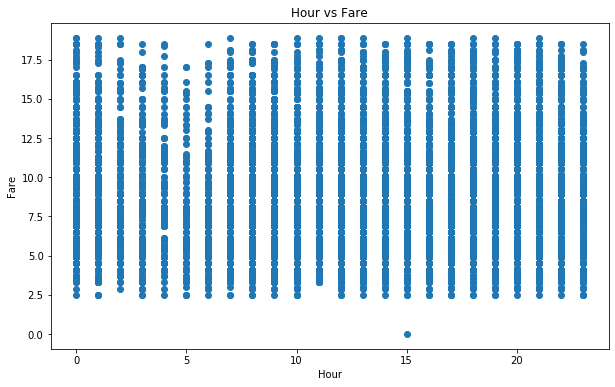

In [93]:
plt.figure(figsize=(10,6))
plt.scatter(df_train.hour, df_train.fare_amount,)
plt.title('Hour vs Fare')
plt.xlabel('Hour')
plt.ylabel('Fare')

The cab fare is amost similar for every hour of the day. There are no higher fares during the late night or early morning.

In [94]:
# initialize map with first row from training data as coordinates
m = folium.Map([40.721317, -73.844315], zoom_start=11)

for index, row in df_train[0:1000].iterrows():
    folium.CircleMarker([row['pickup_latitude'], row['pickup_longitude']],
                        radius=0.00001,
                        fill_color="#3db7e4"
                       ).add_to(m)
    
#convert to (n, 2) nd-array format for heatmap
stationArr = df_train[['pickup_latitude', 'pickup_longitude']].as_matrix()

# plot heatmap
m.add_child(plugins.HeatMap(stationArr, radius=15))
m

C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


Most of the Pick points are concentrated on a particular region which is shown as red.

In [95]:
m = folium.Map([40.712276, -73.841614], zoom_start=11)

for index, row in df_train[0:1000].iterrows():
    folium.CircleMarker([row['dropoff_latitude'], row['dropoff_longitude']],
                        radius=0.00001,
                        fill_color="#3db7e4"
                       ).add_to(m)
    
# convert to (n, 2) nd-array format for heatmap
stationArr = df_train[['dropoff_latitude', 'dropoff_longitude']].as_matrix()

# plot heatmap
m.add_child(plugins.HeatMap(stationArr, radius=15))
m

C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


Most of the drop points are also concetrated in a particular region which is shown as red.

In [96]:
df_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,0.009436
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,0.013674
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,0.025340
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,0.019470
5,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1.0,2011.0,1.0,6.0,3.0,9.0,0.038675


In [97]:
import seaborn as sns

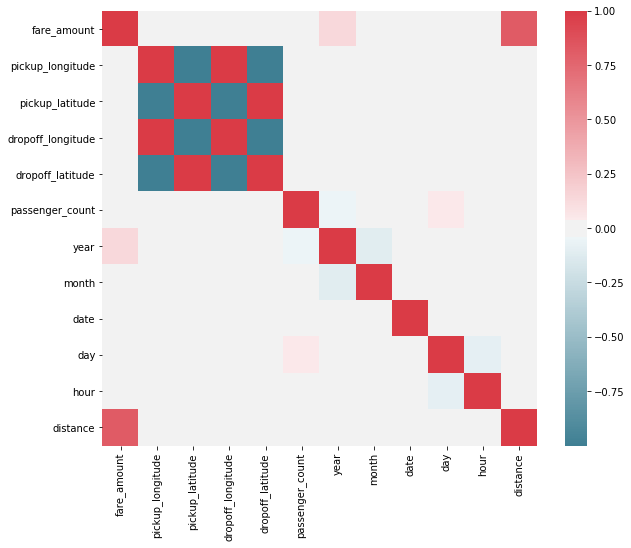

In [98]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

It is clear from the above map that the most important feature for the fare prediction is distance and the second important feature is year. The positive correlation between the distance and the fare is intutive. Little positive correlation between the year and the fare is also observed because each year the fare increases due to inflation. All the rest of the features have almost negligible impact on the cab fare.

In [99]:
df_train.shape

(13228, 13)

In [100]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,distance
count,13228.000000,13228.000000,13228.000000,13228.000000,13228.000000,13228.000000,13228.000000,13228.000000,13228.000000,13228.000000,13228.000000,1.322800e+04
mean,8.471245,-73.919642,40.691444,-73.918394,40.691725,1.564182,2011.662610,6.224373,15.693756,3.029861,13.609238,2.333821e-02
std,3.537566,2.638695,2.639067,2.638825,2.638621,1.122783,1.861526,3.452319,8.690657,1.963398,6.456566,1.489568e-02
min,0.010000,-74.229138,-74.006893,-74.227047,-73.994392,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,1.000000e-06
25%,5.700000,-73.992543,40.737882,-73.991650,40.738212,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.213372e-02
50%,7.700000,-73.982371,40.753452,-73.981467,40.754434,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,1.961992e-02
75%,10.500000,-73.970236,40.766968,-73.968971,40.767556,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,3.095051e-02
max,18.900000,40.766125,41.035688,40.802437,41.028363,5.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,7.794537e-02


In [101]:
#df['Time'] = [datetime.datetime.time(d) for d in df['pickup_datetime']]
#df['pickup_date'] = [datetime.datetime.date(d) for d in df['pickup_datetime']]

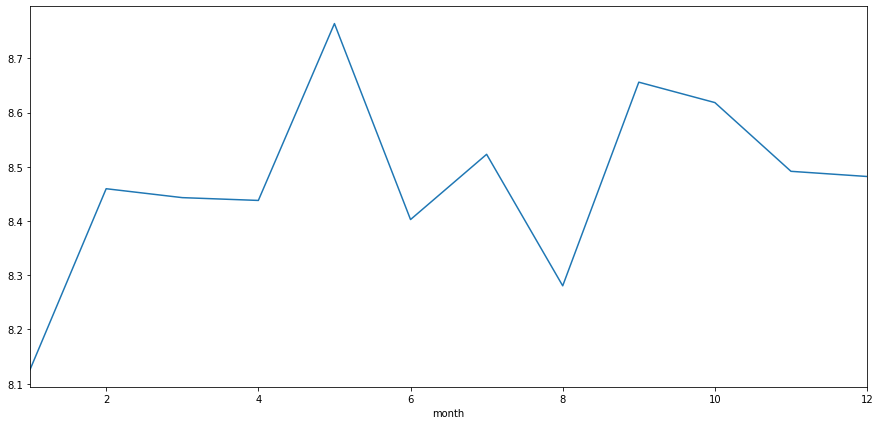

In [102]:
#df.sort_values("month").plot(x='month', y='fare_amount',)
df = df_train.copy()
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['month']).mean()['fare_amount'].plot(ax=ax)

Text(0, 0.5, 'fare')

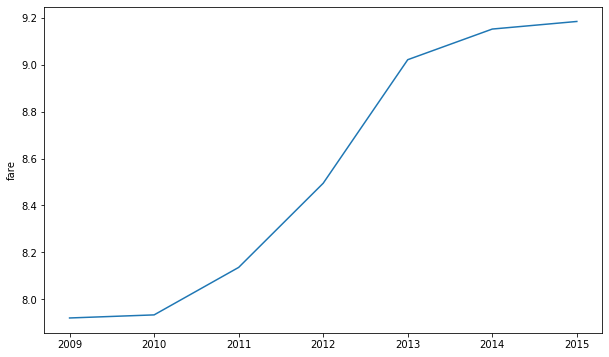

In [103]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(df_train.groupby(['year']).mean()['fare_amount'] )
#df_train.groupby(['year']).mean()['fare_amount'].plot(ax=ax)
plt.ylabel("fare")

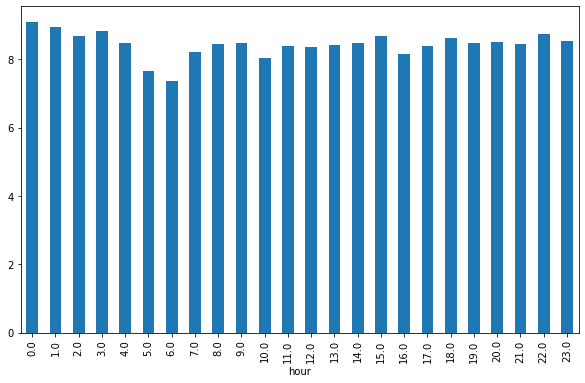

In [104]:
fig, ax = plt.subplots(figsize=(10,6))
df_train.groupby(['hour']).mean()['fare_amount'].plot.bar(ax=ax)

In [50]:
df = df_train.copy()
df.groupby("passenger_count")["fare_amount"].mean() 

passenger_count
1.0    8.428407
2.0    8.620036
3.0    8.742708
4.0    8.923843
5.0    8.286281
Name: fare_amount, dtype: float64

In [105]:
# convering the numerical value for day column into the name of the day
df = df_train.copy()
df.loc[df['day'] == 0, 'day'] = 'Sunday'
df.loc[df['day'] == 1, 'day'] = 'Monday'
df.loc[df["day"] == 2, "day"] = 'Tuesday'
df.loc[df['day'] == 3, 'day'] = "Wednesday"
df.loc[df['day'] == 4, 'day'] = "Thursday"
df.loc[df['day'] == 5, 'day'] = 'Friday'
df.loc[df['day'] == 6, 'day'] = "Saturday"

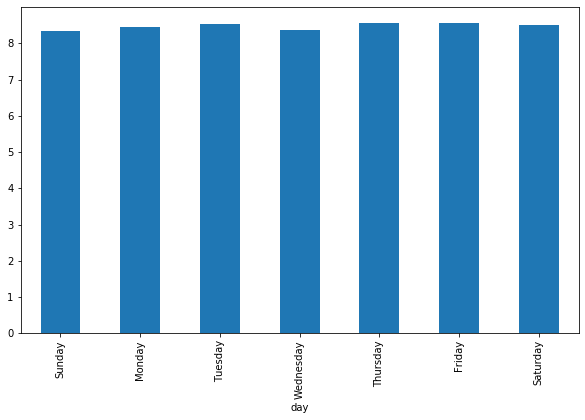

In [106]:
fig, ax = plt.subplots(figsize=(10,6))
dow = ["Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Saturday"]
df.groupby(['day']).mean().reindex(dow)["fare_amount"].plot.bar(ax = ax)

The mean fare for each day of the week is almost same.

In [54]:
#df = df_test.copy()
#for i in range(len(dow)):
 #   df.loc[df['day'] == i, 'day'] = dow[i]

In [107]:
#df.head()

In [108]:
df_train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                        float64
month                       float64
date                        float64
day                         float64
hour                        float64
distance                    float64
dtype: object

In [110]:
# chosing the features and spliting the test train data
X = df_train[["distance","passenger_count","year","hour","day"]]
Y = df_train["fare_amount"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [111]:
X_train.head()

,distance,passenger_count,year,hour,day
593,0.016971,1.0,2013.0,8.0,2.0
15435,0.011888,2.0,2011.0,20.0,0.0
5747,0.030508,1.0,2011.0,18.0,1.0
8685,0.007026,1.0,2010.0,23.0,4.0
9375,0.057366,1.0,2015.0,18.0,5.0


In [54]:
y_train.head()

10226    12.5
11212    11.7
2321     14.5
999      10.9
5574      8.1
Name: fare_amount, dtype: float64

In [143]:
LinReg = linear_model.LinearRegression()
LinReg.fit(X_train, y_train)
print(LinReg.score(X_train,y_train))
print(LinReg.score(X_test, y_test))

0.691086931748176
0.6884737235519236


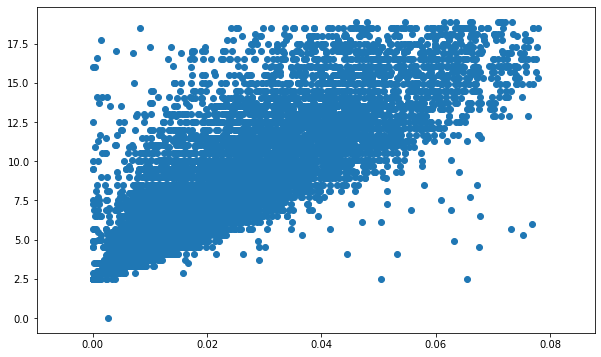

In [134]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df_train["distance"], df_train["fare_amount"])
ax.line()

In [145]:
# getting the coefficient for the each feature
coeff_df = pd.DataFrame(LinReg.coef_, X.columns, columns=['Coefficient'])
coeff_df["Normalized Coefficient"] = coeff_df['Coefficient']/coeff_df['Coefficient'].max()
coeff_df

,Coefficient,Normalized Coefficient
distance,195.036463,1.000000
passenger_count,0.045475,0.000233
year,0.322265,0.001652
hour,0.011788,0.000060
day,-0.018547,-0.000095


Above dataframe represents the coefficients and the normalized coefficients for each feature. It is clear from the above data frame that the distance have maximum impact on on the prediction while all the feature have very low impact. We can ignore those
features for the further models.

Text(0, 0.5, 'Normalized Coefficient')

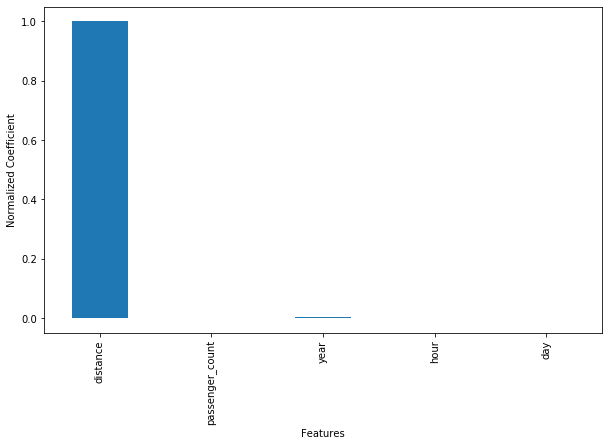

In [149]:
# bar graph of the coefficients for each feature 
fig, ax = plt.subplots(figsize=(10,6))
coeff_df["Normalized Coefficient"].plot.bar(ax=ax)
plt.xlabel("Features")
plt.ylabel("Normalized Coefficient")

In [115]:
y_pred = LinReg.predict(X_test)
y_pred

array([ 5.57998328,  7.73551909, 10.33673341, ...,  7.07440109,
       14.15629965,  5.01966232])

Text(0, 0.5, 'Actual')

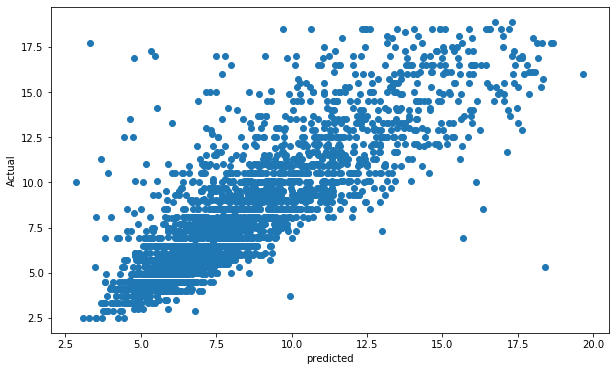

In [132]:
# graph between the predicted and the actual value of fare amount
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(y_pred, y_test)
plt.xlabel("predicted")
plt.ylabel("Actual")

The above graph is between the predicted values and the actual values of fare amount. Our model predict well because the plot
linear but still there are some predictions which are quite off the pattern. We have to remove them in our further models.

In [125]:
# determine the error in the linear regression model
print('Mean Absolute Error for test data:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error for test data:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error for test data:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error for test data: 1.4230429130690354
Mean Squared Error for test data: 3.8729525129323115
Root Mean Squared Error for test data: 1.9679818375514322


In [124]:
print('Mean Absolute Error for train data:', metrics.mean_absolute_error(y_train, LinReg.predict(X_train)))
print('Mean Squared Error for train data:', metrics.mean_squared_error(y_train, LinReg.predict(X_train)))
print('Root Mean Squared Error for train data:', np.sqrt(metrics.mean_squared_error(y_train, LinReg.predict(X_train))))

Mean Absolute Error for train data: 1.4356792850018092
Mean Squared Error for train data: 3.871834749451557
Root Mean Squared Error for train data: 1.9676978298131949


Because the error for the test data and the train for our linear regression model are almost close. It means our model is fit well. It is neither underfitted nor overfitted.

In [150]:
# now finally predicting the fare for the given test data
X_df_test = df_test[["distance","passenger_count","year","hour","day"]]

# prediction from given test data
final_pred_LR = LinReg.predict(X_df_test)
final_pred_LR

array([9.20835256, 9.52545574, 4.76267012, ..., 7.87768166, 8.05262826,
       9.86190494])

## Creating the Decision Tree Model

In [186]:
# creating Decision tree model
tree = DecisionTreeRegressor(random_state=0)
DTmodel = DecisionTreeRegressor(max_depth=7,)
# fitting to the training data
DTmodel.fit(X_train,y_train)
# predictions
y_predDT = DTmodel.predict(X_test)

Text(0, 0.5, 'Actual')

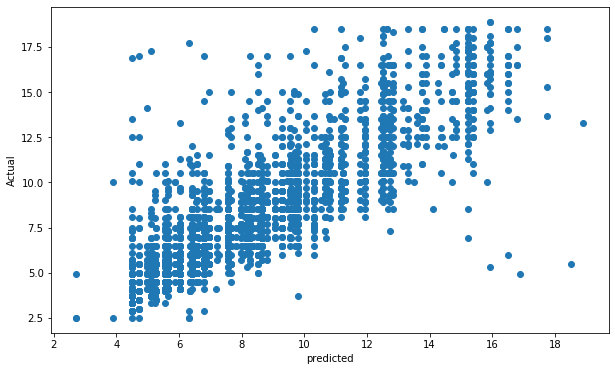

In [187]:
# graph between the predicted and the actual value of fare amount
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(y_predDT, y_test)
plt.xlabel("predicted")
plt.ylabel("Actual")

In [189]:
# determine the error in the desicion tree model
print('Mean Absolute Error for test data:', metrics.mean_absolute_error(y_test, y_predDT))
print('Mean Squared Error for test data:', metrics.mean_squared_error(y_test, y_predDT))
print('Root Mean Squared Error for test data:', np.sqrt(metrics.mean_squared_error(y_test, y_predDT)))

Mean Absolute Error for test data: 1.3807786553483563
Mean Squared Error for test data: 3.819547049537367
Root Mean Squared Error for test data: 1.9543661503253087


In [190]:
print('Mean Absolute Error for train data:', metrics.mean_absolute_error(y_train, DTmodel.predict(X_train)))
print('Mean Squared Error for train data:', metrics.mean_squared_error(y_train, DTmodel.predict(X_train)))
print('Root Mean Squared Error for train data:', np.sqrt(metrics.mean_squared_error(y_train, DTmodel.predict(X_train))))

Mean Absolute Error for train data: 1.3177026643552636
Mean Squared Error for train data: 3.275784112589744
Root Mean Squared Error for train data: 1.8099127361808756


In [191]:
# now finally predicting the fare for the given test data
X_df_test = df_test[["distance","passenger_count","year","hour","day"]]

# prediction from given test data
final_pred_DT = DTmodel.predict(X_df_test)
final_pred_DT

array([ 9.28373016, 10.30263158,  4.51378151, ...,  7.66216216,
        7.66216216,  9.07281553])

## Creating a Random Forest Regressor Model

In this model we will use GridSearchCV to fine tune our model.

In [192]:
tree = RandomForestRegressor(n_estimators=29, random_state=0)
param_grid = {"max_depth":range(2,10), "max_features":range(1,5),"n_estimators": range(20,30)}
grid_search = GridSearchCV(tree, param_grid, cv = 3, n_jobs = 2, verbose = 1)
grid_search.fit(X_train,y_train)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 tasks      | elapsed:   49.3s
[Parallel(n_jobs=2)]: Done 350 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 850 tasks      | elapsed:  2.0min
[Parallel(n_jobs=2)]: Done 957 out of 960 | elapsed:  2.2min remaining:    0.3s
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed:  2.2min finished


### best paramters
From the GridSearchCV we can determine the best parameters to work with.

In [213]:
grid_search.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 28}

,importance
Distance,0.921693
Passenger Count,0.004857
Year,0.039390
Hour,0.024547
Day,0.009513


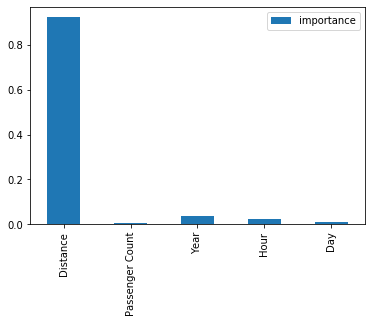

In [195]:
# creating a dataframe of feature importance
feat_df = pd.DataFrame({"importance":best_model.feature_importances_}, index = 
                       ["Distance","Passenger Count","Year","Hour","Day"])

feat_df.plot.bar()
feat_df

In [203]:
y_predRF = grid_search.predict(X_test)

Text(0, 0.5, 'Actual')

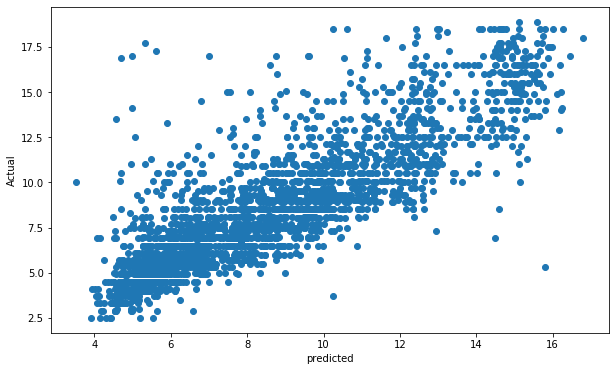

In [204]:
# graph between the predicted and the actual value of fare amount
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(y_predRF, y_test)
plt.xlabel("predicted")
plt.ylabel("Actual")

In [199]:
# determine the error in the desicion tree model
print('Mean Absolute Error for test data:', metrics.mean_absolute_error(y_test, y_predRF))
print('Mean Squared Error for test data:', metrics.mean_squared_error(y_test, y_predRF))
print('Root Mean Squared Error for test data:', np.sqrt(metrics.mean_squared_error(y_test, y_predRF)))

Mean Absolute Error for test data: 1.348110046179807
Mean Squared Error for test data: 3.5015639183011844
Root Mean Squared Error for test data: 1.8712466214535124


In [200]:
print('Mean Absolute Error for train data:', metrics.mean_absolute_error(y_train, grid_search.predict(X_train)))
print('Mean Squared Error for train data:', metrics.mean_squared_error(y_train, grid_search.predict(X_train)))
print('Root Mean Squared Error for train data:', np.sqrt(metrics.mean_squared_error(y_train, grid_search.predict(X_train))))

Mean Absolute Error for train data: 1.2549948520321739
Mean Squared Error for train data: 2.9323599188707465
Root Mean Squared Error for train data: 1.7124134777765405


In [82]:
best_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=28, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [83]:
grid_search

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=29, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=2

In [206]:
grid_search.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 28}

Text(0, 0.5, 'Actual')

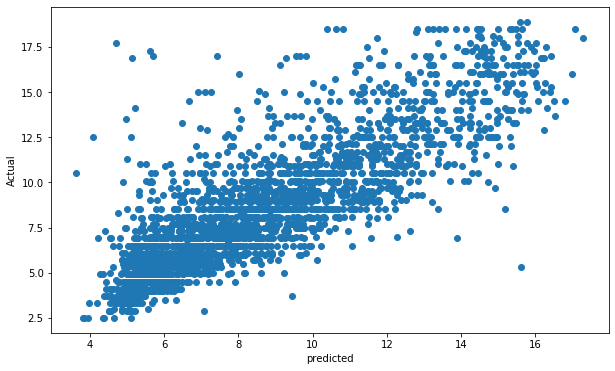

In [211]:
ypred = grid_search2.predict(X_test)
# graph between the predicted and the actual value of fare amount
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(ypred, y_test)
plt.xlabel("predicted")
plt.ylabel("Actual")

In [212]:
# determine the error in the desicion tree model
print('Mean Absolute Error for test data:', metrics.mean_absolute_error(y_test, ypred))
print('Mean Squared Error for test data:', metrics.mean_squared_error(y_test, ypred))
print('Root Mean Squared Error for test data:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))

Mean Absolute Error for test data: 1.4072138953715436
Mean Squared Error for test data: 3.7388992100314953
Root Mean Squared Error for test data: 1.9336233371656164


In [214]:
# now finally predicting the fare for the given test data
X_df_test = df_test[["distance","passenger_count","year","hour","day"]]

# prediction from given test data
final_pred_DT = grid_search.predict(X_df_test)
final_pred_DT

array([ 9.70113629, 10.38214672,  4.65508251, ...,  7.31949643,
        8.00877121,  9.45463401])